[70 points] 1 data collection and exploration in the real world: You have to collect data (at least 50 samples, more the better) via any experiment of your choice. You must ensure data quality. CLearly define relevant attributes. Perform data exploration, study the distributions and if possible, try some mathematical models to explain the data and get insights.



In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Course Work/Sem 4/Data Analysis and Visualization/Homework 1/panic_attack_dataset.csv")

In [ ]:
df.head()

,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
0,1,56,Female,9,5,Caffeine,134,Yes,No,Yes,...,No,Anxiety,No,2,3,6.4,5,Yes,Yes,5
1,2,46,Male,8,9,Stress,139,Yes,Yes,No,...,No,PTSD,Yes,2,5,5.0,3,No,Yes,7
2,3,32,Female,6,31,PTSD,141,No,Yes,Yes,...,No,Depression,No,4,0,8.3,8,No,Yes,7
3,4,60,Male,5,20,Caffeine,109,Yes,Yes,No,...,Yes,Depression,No,3,3,5.3,8,No,No,1
4,5,25,Non-binary,6,10,Caffeine,101,Yes,No,Yes,...,Yes,Depression,No,3,6,7.2,2,No,No,5


In [ ]:
print("Dataset Information")
df.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1200 non-null   int64  
 1   Age                     1200 non-null   int64  
 2   Gender                  1200 non-null   object 
 3   Panic_Attack_Frequency  1200 non-null   int64  
 4   Duration_Minutes        1200 non-null   int64  
 5   Trigger                 1200 non-null   object 
 6   Heart_Rate              1200 non-null   int64  
 7   Sweating                1200 non-null   object 
 8   Shortness_of_Breath     1200 non-null   object 
 9   Dizziness               1200 non-null   object 
 10  Chest_Pain              1200 non-null   object 
 11  Trembling               1200 non-null   object 
 12  Medical_History         1078 non-null   object 
 13  Medication              1200 non-null   object 
 14  Caffeine_Intake     

In [ ]:
print("Summary Statistics")
df.describe(include="all")

Summary Statistics


,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
count,1200.000000,1200.000000,1200,1200.000000,1200.00000,1200,1200.000000,1200,1200,1200,...,1200,1078,1200,1200.000000,1200.000000,1200.000000,1200.000000,1200,1200,1200.000000
unique,NaN,NaN,3,NaN,NaN,6,NaN,2,2,2,...,2,3,2,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,Female,NaN,NaN,Unknown,NaN,Yes,Yes,Yes,...,No,Anxiety,No,NaN,NaN,NaN,NaN,No,Yes,NaN
freq,NaN,NaN,549,NaN,NaN,206,NaN,836,746,620,...,610,492,700,NaN,NaN,NaN,NaN,875,605,NaN
mean,600.500000,41.134167,NaN,4.412500,24.39250,NaN,120.302500,NaN,NaN,NaN,...,NaN,NaN,NaN,2.539167,2.955000,6.481583,4.416667,NaN,NaN,5.569167
std,346.554469,13.543412,NaN,2.847648,11.39993,NaN,23.369912,NaN,NaN,NaN,...,NaN,NaN,NaN,1.716854,2.061516,1.405625,2.902598,NaN,NaN,2.793155
min,1.000000,18.000000,NaN,0.000000,5.00000,NaN,80.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,4.000000,0.000000,NaN,NaN,1.000000
25%,300.750000,29.000000,NaN,2.000000,15.00000,NaN,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,1.000000,5.300000,2.000000,NaN,NaN,3.000000
50%,600.500000,42.000000,NaN,4.000000,24.00000,NaN,121.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,3.000000,3.000000,6.500000,4.000000,NaN,NaN,6.000000
75%,900.250000,53.000000,NaN,7.000000,34.00000,NaN,141.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,4.000000,5.000000,7.600000,7.000000,NaN,NaN,8.000000


In [ ]:
print("Missing Values")
df.isnull().sum()

Missing Values


,0
ID,0
Age,0
Gender,0
Panic_Attack_Frequency,0
Duration_Minutes,0
Trigger,0
Heart_Rate,0
Sweating,0
Shortness_of_Breath,0
Dizziness,0


In [ ]:
##Dataset Cleaning

In [ ]:
##Handling missing values i.e. filling the numerical columns with the means and filling the categorical columns with the mode

In [ ]:
for col in df.select_dtypes(include=[np.number]).columns:
  df[col].fillna(df[col].mean(),inplace=True)

<ipython-input-20-bf97b3a8f21a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [ ]:
for col in df.select_dtypes(include=[object]).columns:
  df[col].fillna(df[col].mode()[0],inplace=True)

<ipython-input-22-9e5be7087d2f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe(include="all")

,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
count,1200.000000,1200.000000,1200,1200.000000,1200.00000,1200,1200.000000,1200,1200,1200,...,1200,1200,1200,1200.000000,1200.000000,1200.000000,1200.000000,1200,1200,1200.000000
unique,NaN,NaN,3,NaN,NaN,6,NaN,2,2,2,...,2,3,2,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,Female,NaN,NaN,Unknown,NaN,Yes,Yes,Yes,...,No,Anxiety,No,NaN,NaN,NaN,NaN,No,Yes,NaN
freq,NaN,NaN,549,NaN,NaN,206,NaN,836,746,620,...,610,614,700,NaN,NaN,NaN,NaN,875,605,NaN
mean,600.500000,41.134167,NaN,4.412500,24.39250,NaN,120.302500,NaN,NaN,NaN,...,NaN,NaN,NaN,2.539167,2.955000,6.481583,4.416667,NaN,NaN,5.569167
std,346.554469,13.543412,NaN,2.847648,11.39993,NaN,23.369912,NaN,NaN,NaN,...,NaN,NaN,NaN,1.716854,2.061516,1.405625,2.902598,NaN,NaN,2.793155
min,1.000000,18.000000,NaN,0.000000,5.00000,NaN,80.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,4.000000,0.000000,NaN,NaN,1.000000
25%,300.750000,29.000000,NaN,2.000000,15.00000,NaN,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,1.000000,5.300000,2.000000,NaN,NaN,3.000000
50%,600.500000,42.000000,NaN,4.000000,24.00000,NaN,121.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,3.000000,3.000000,6.500000,4.000000,NaN,NaN,6.000000
75%,900.250000,53.000000,NaN,7.000000,34.00000,NaN,141.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,4.000000,5.000000,7.600000,7.000000,NaN,NaN,8.000000


In [ ]:
for col in df.select_dtypes(include=[object]).columns:
  print(col,df[col].unique())

Gender ['Female' 'Male' 'Non-binary']
Trigger ['Caffeine' 'Stress' 'PTSD' 'Social Anxiety' 'Unknown' 'Phobia']
Sweating ['Yes' 'No']
Shortness_of_Breath ['No' 'Yes']
Dizziness ['Yes' 'No']
Chest_Pain ['Yes' 'No']
Trembling ['No' 'Yes']
Medical_History ['Anxiety' 'PTSD' 'Depression']
Medication ['No' 'Yes']
Smoking ['Yes' 'No']
Therapy ['Yes' 'No']


In [ ]:
for col in df.select_dtypes(include=[object]).columns:
  df[col] = df[col].str.lower().str.strip()

In [ ]:
for col in df.select_dtypes(include=[object]).columns:
  print(col,df[col].unique())

Gender ['female' 'male' 'non-binary']
Trigger ['caffeine' 'stress' 'ptsd' 'social anxiety' 'unknown' 'phobia']
Sweating ['yes' 'no']
Shortness_of_Breath ['no' 'yes']
Dizziness ['yes' 'no']
Chest_Pain ['yes' 'no']
Trembling ['no' 'yes']
Medical_History ['anxiety' 'ptsd' 'depression']
Medication ['no' 'yes']
Smoking ['yes' 'no']
Therapy ['yes' 'no']


In [ ]:
##Outlier detection and removal

In [ ]:
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores>3).any(axis=1)
print(outliers.sum())

0


In [ ]:
df = df[~outliers]

In [ ]:
##Univariate Analysis

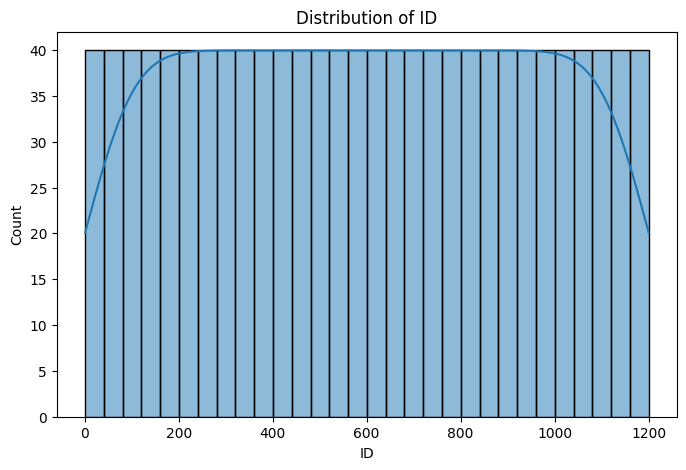

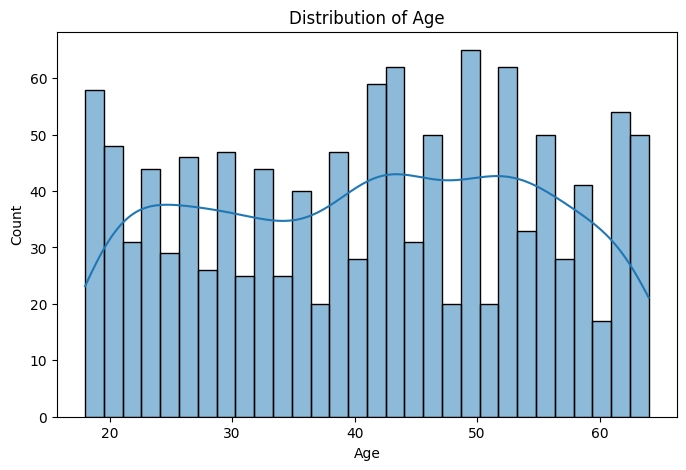

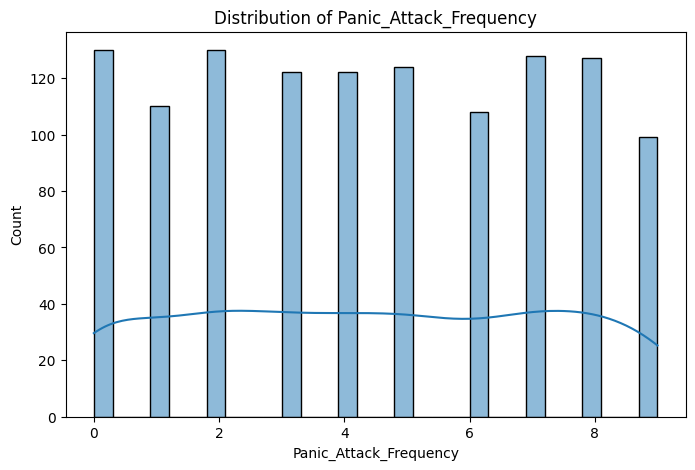

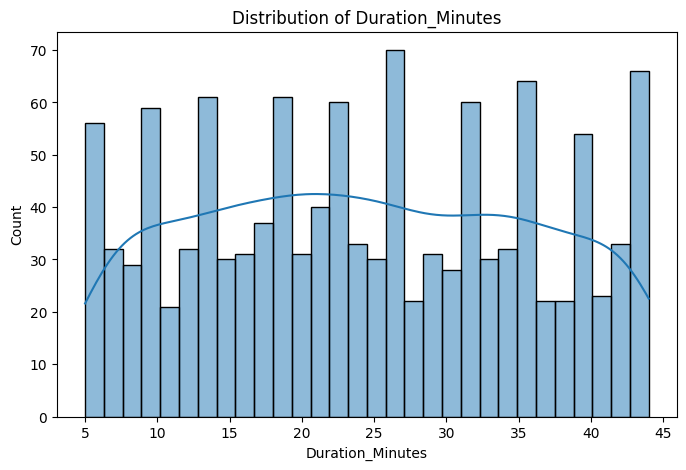

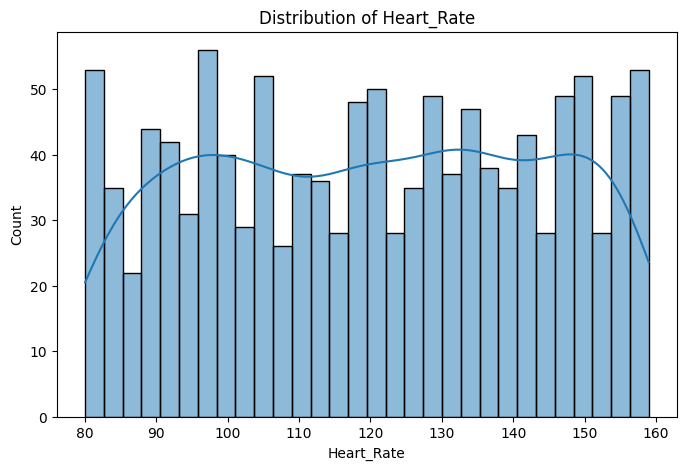

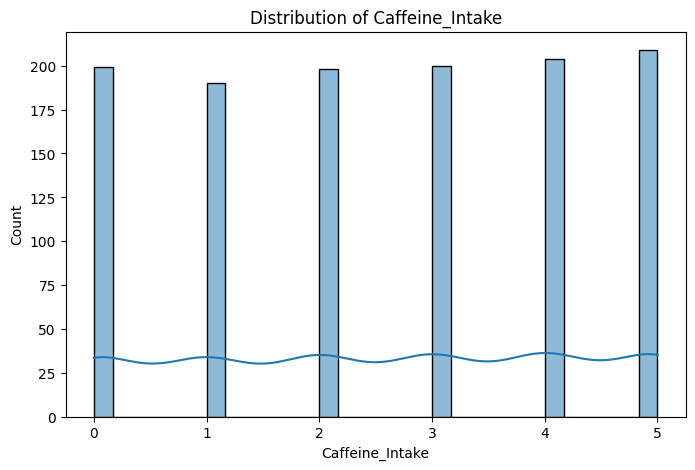

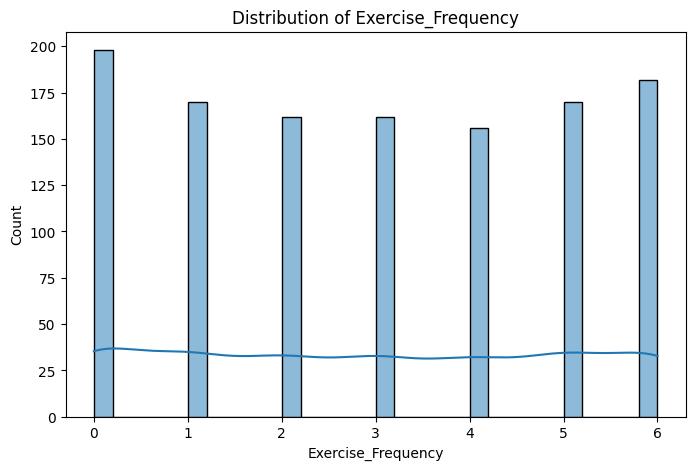

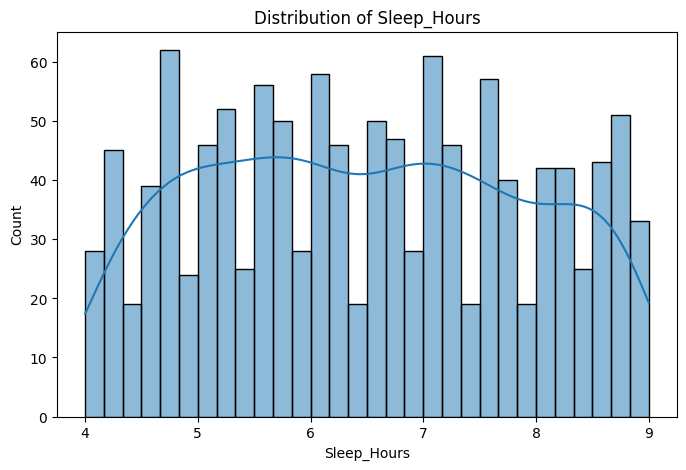

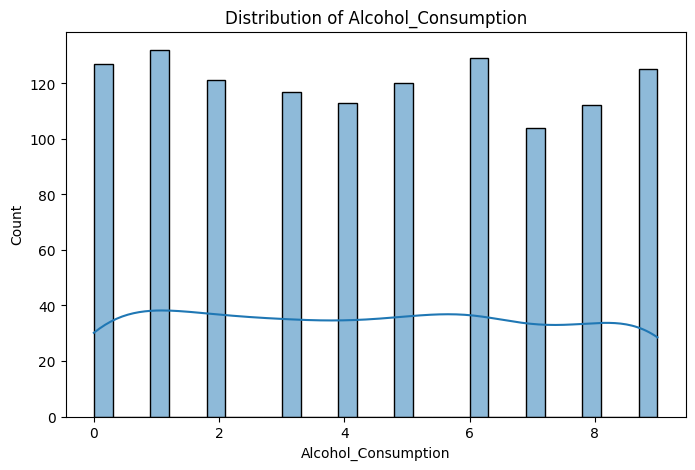

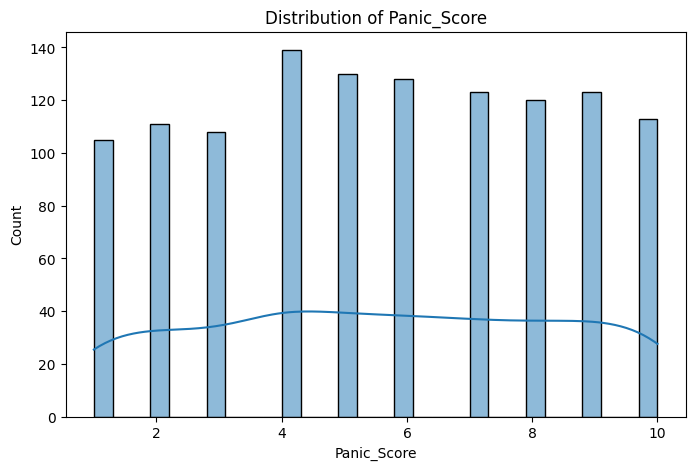

In [ ]:
##Numerical columns
for col in df.select_dtypes(include=[np.number]).columns:
  plt.figure(figsize=(8,5))
  sns.histplot(df[col],kde=True,bins=30)
  plt.title(f"Distribution of {col}")
  plt.show()

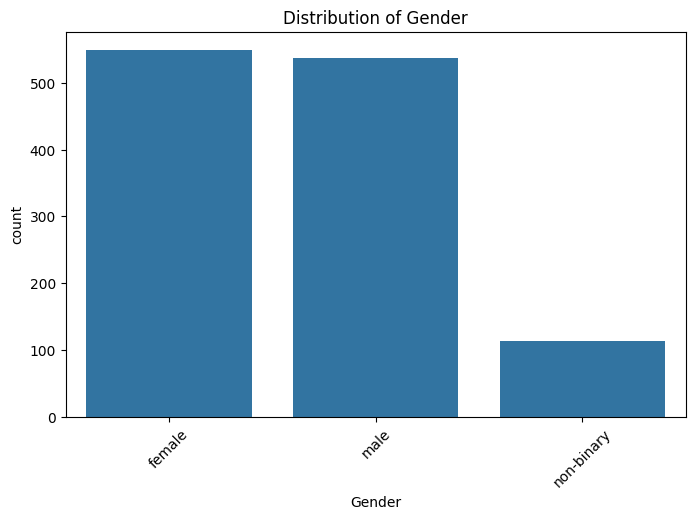

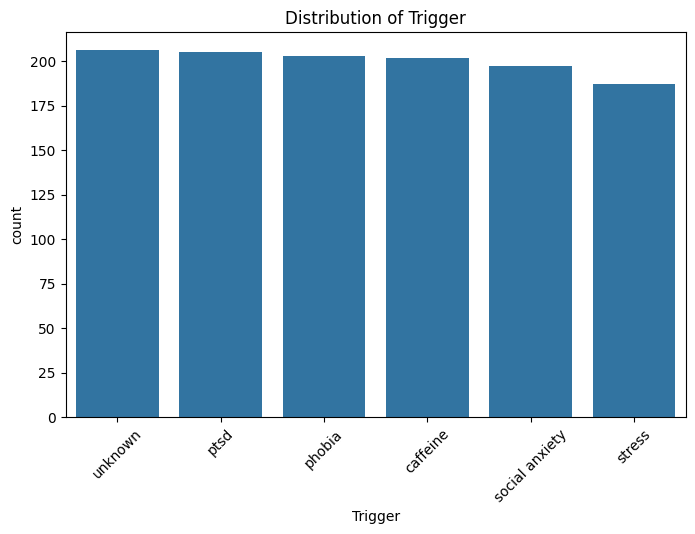

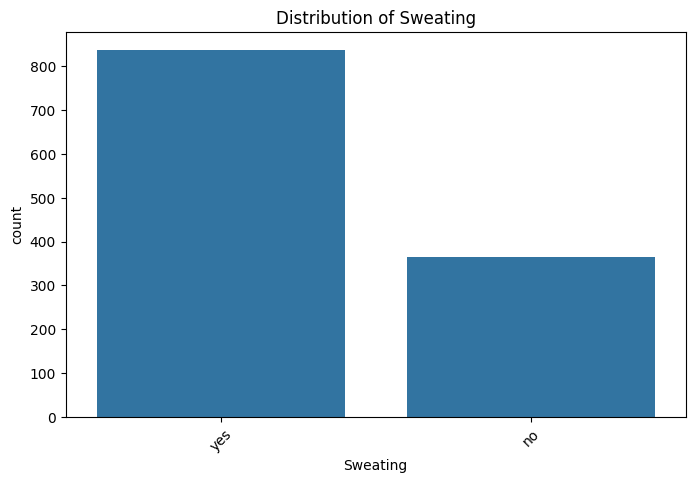

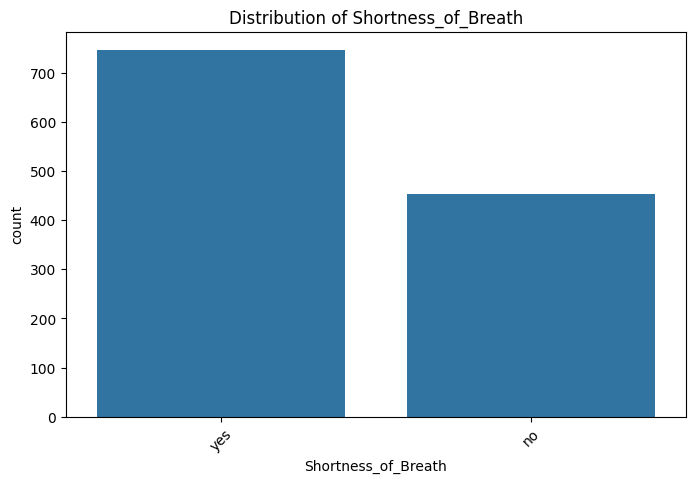

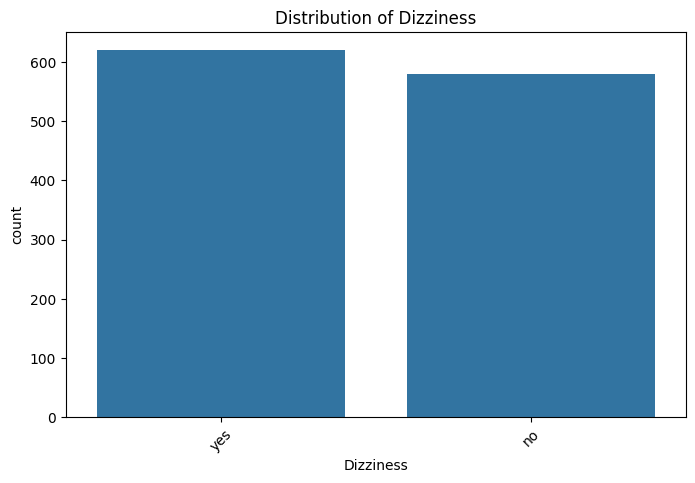

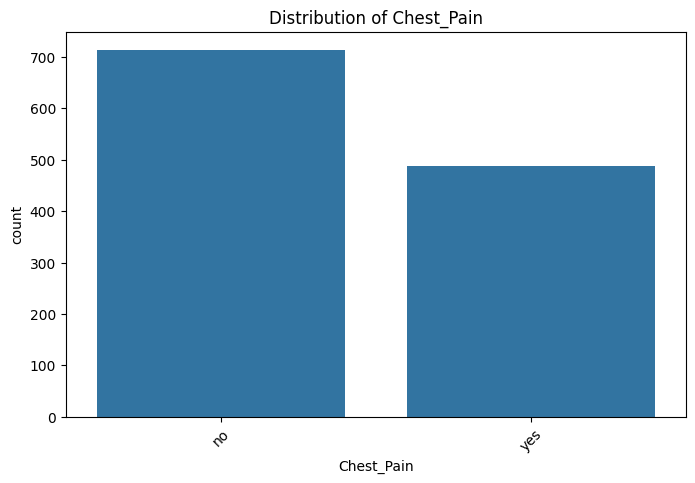

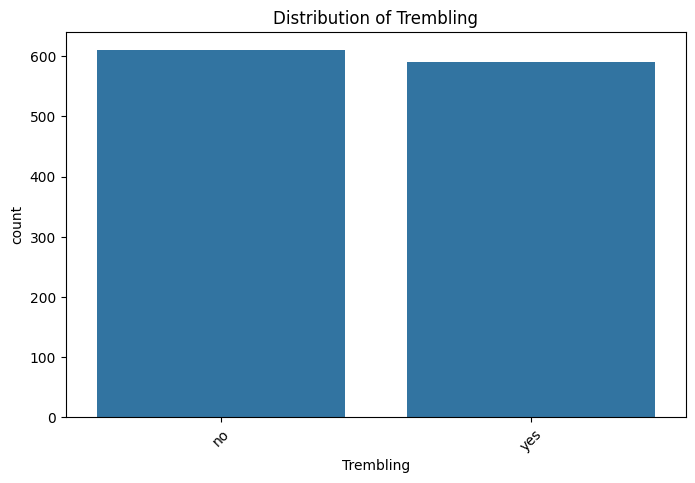

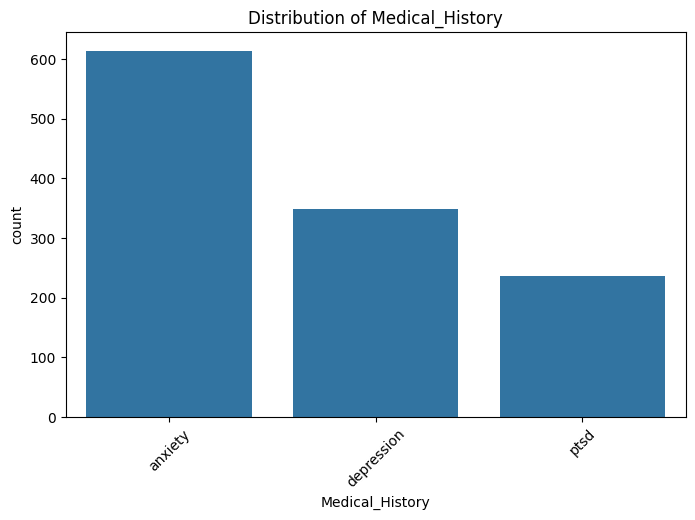

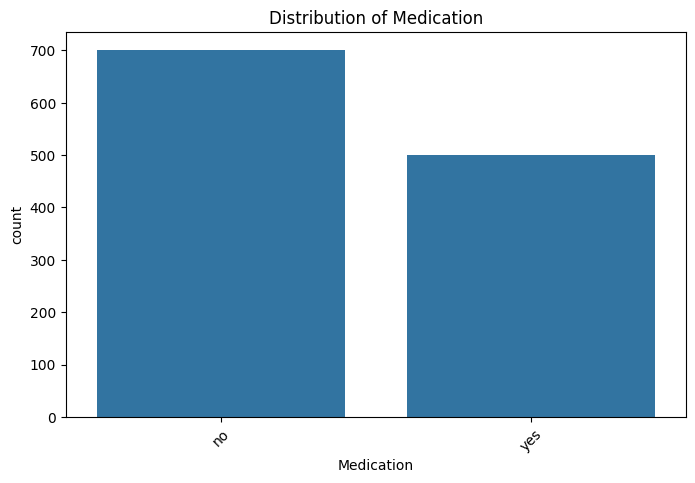

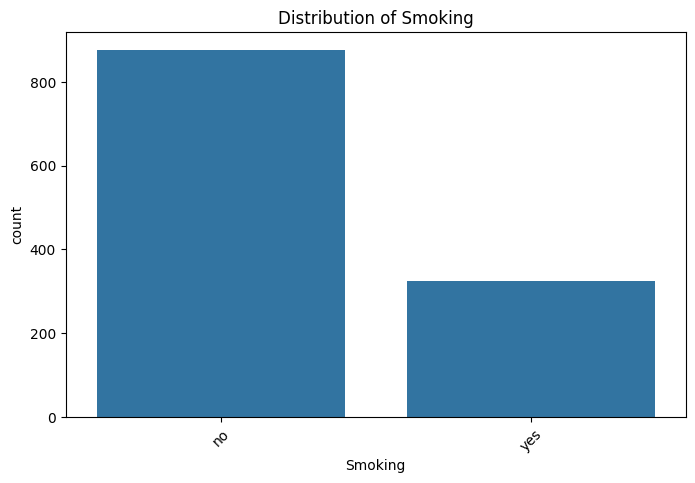

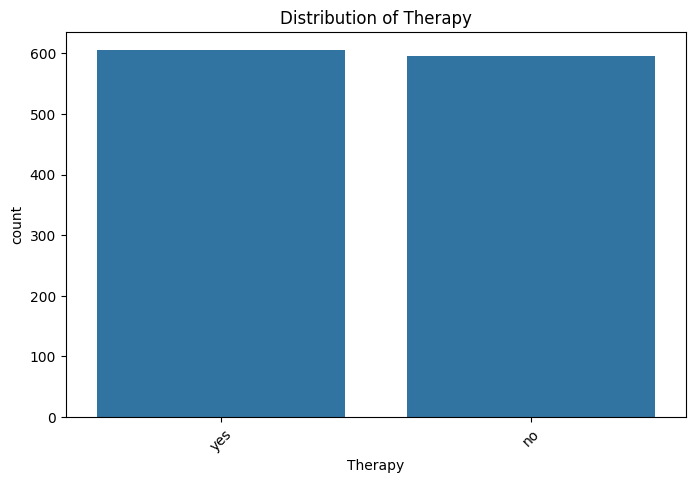

In [ ]:
for col in df.select_dtypes(include=[object]).columns:
  plt.figure(figsize=(8,5))
  sns.countplot(data=df,x=col,order=df[col].value_counts().index)
  plt.title(f"Distribution of {col}")
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
##Bivariate Analysis

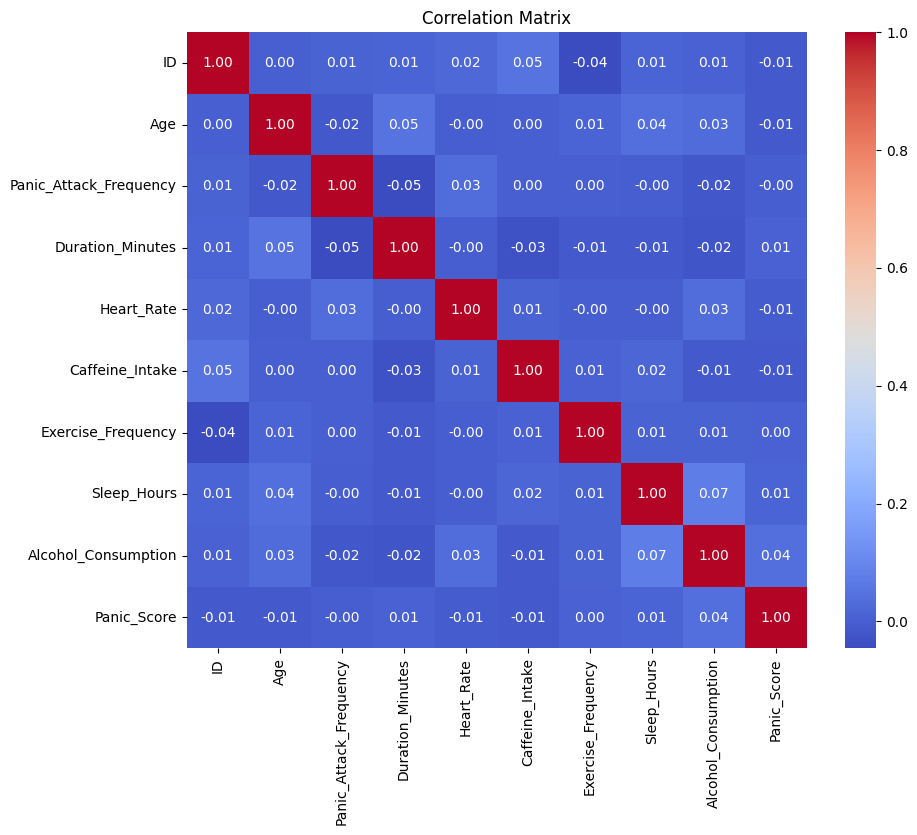

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

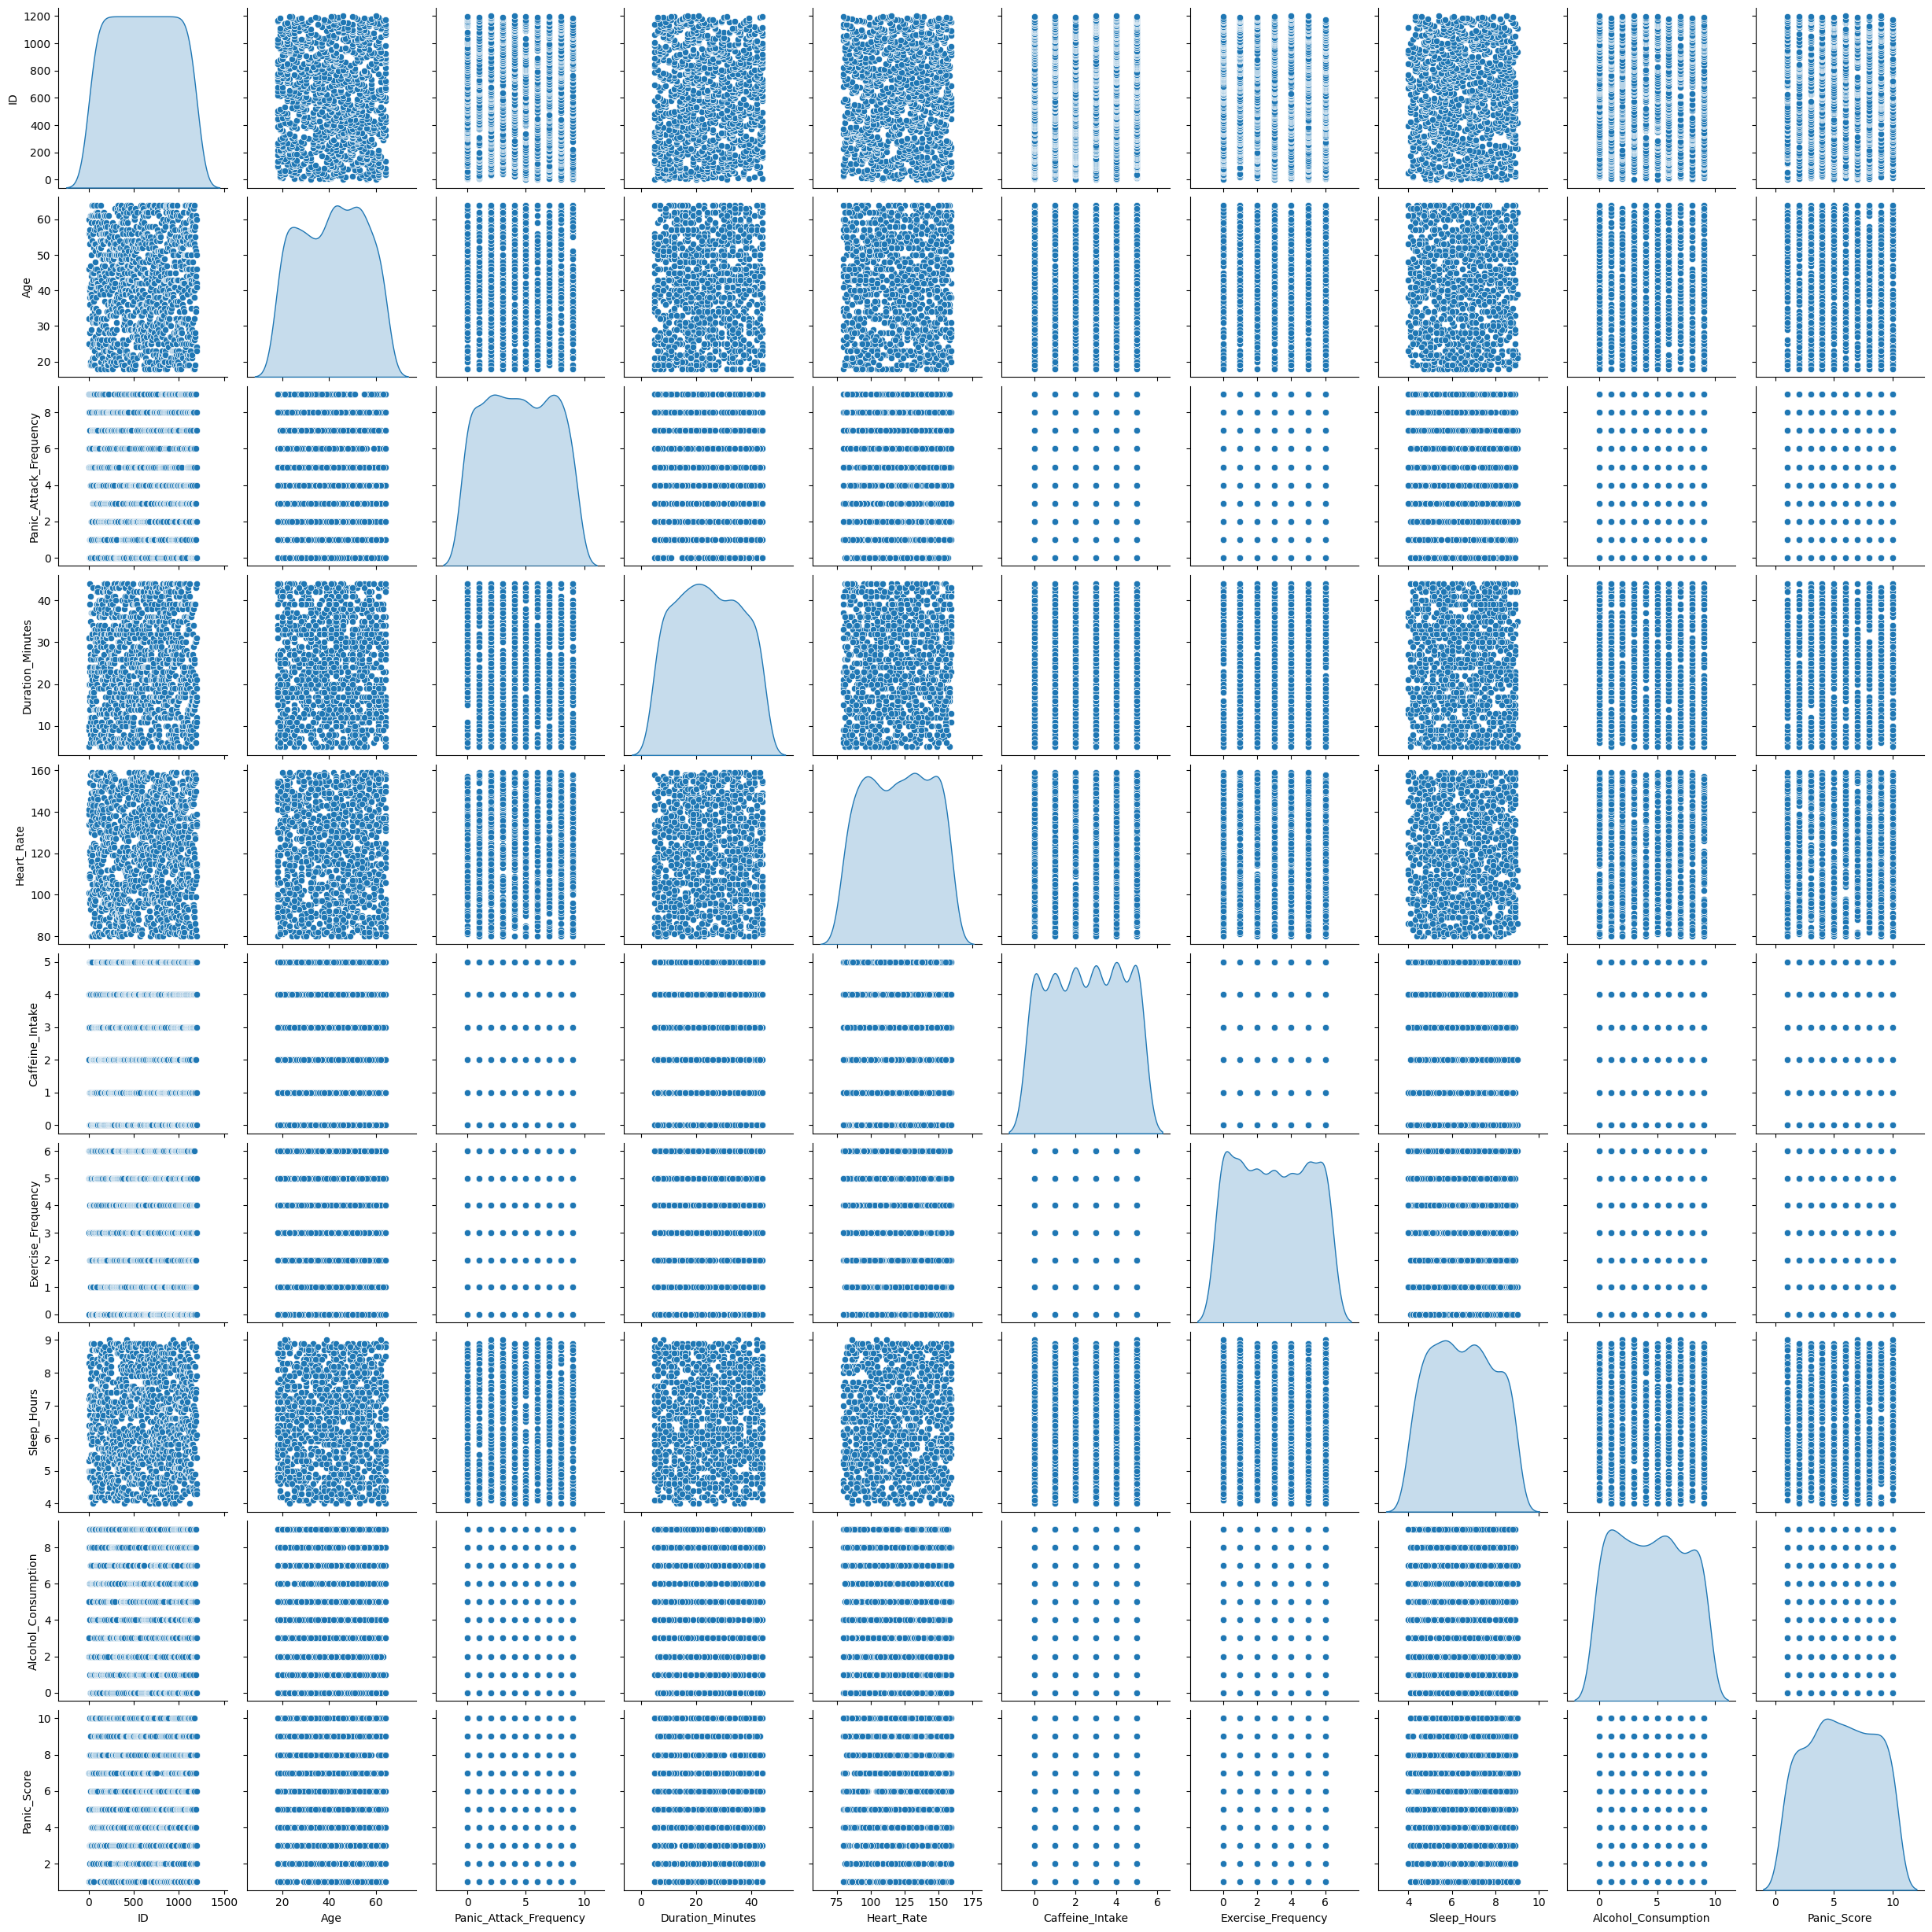

In [ ]:
sns.pairplot(df.select_dtypes(include=[np.number]),diag_kind="kde")
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr().unstack().sort_values(ascending=False)
correlation_matrix = correlation_matrix[correlation_matrix < 1]
print("Top Correlations: ")
print (correlation_matrix.head(10))

Top Correlations: 
Sleep_Hours          Alcohol_Consumption    0.073000
Alcohol_Consumption  Sleep_Hours            0.073000
ID                   Caffeine_Intake        0.052117
Caffeine_Intake      ID                     0.052117
Age                  Duration_Minutes       0.051134
Duration_Minutes     Age                    0.051134
Panic_Score          Alcohol_Consumption    0.038929
Alcohol_Consumption  Panic_Score            0.038929
Age                  Sleep_Hours            0.038110
Sleep_Hours          Age                    0.038110
dtype: float64
